In [4]:
# Import required packages
import pandas as pd
import numpy as np

In [5]:
# Reading the data
df = pd.read_csv('/train.csv')
titanic_details = df.copy()
titanic_details.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now since we have the dataframe, we will see how the data is column by column.

In [6]:
titanic_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It can be infered here that the cabin column has lot of null values

# **Data Analysis**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

catplot can be used here to categorize the columns and plot them

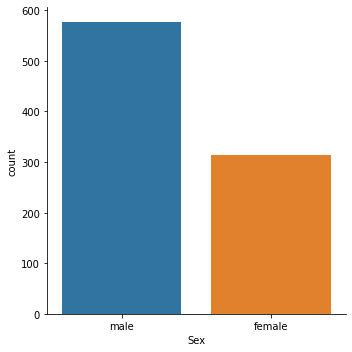

In [8]:
sns.catplot(x='Sex', data=titanic_details, kind='count')

Now let us see how many where males and females in different classes

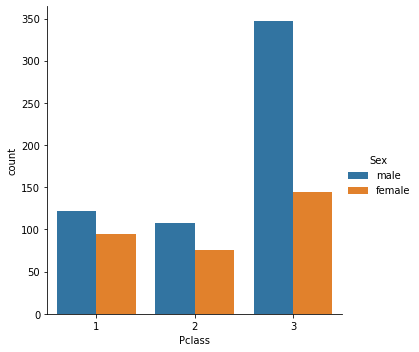

In [9]:
sns.catplot(x='Pclass', data=titanic_details, kind='count', hue='Sex')

This gives us an idea that more people who were in class 3 were men. And in class 1, it was almost same. This could be because it was family up there mostly.

In [10]:
def is_single(passengers):
  sibling, parent = passengers

  if (sibling + parent > 0):
    return False
  else:
    return True

In [11]:
titanic_details['Single'] = titanic_details[['SibSp', 'Parch']].apply(is_single, axis=1) # axis =1 since it is a column and not index
titanic_details.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


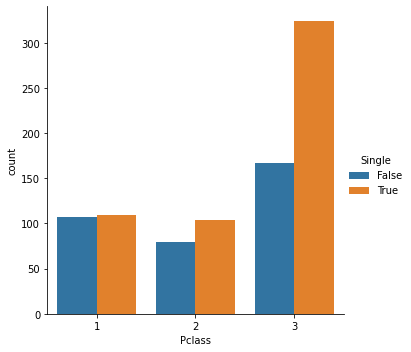

In [12]:
sns.catplot(x='Pclass', data=titanic_details, hue='Single', kind='count')

Yes as we predicted, in the class 1, the count of family is higher compared to rest of the classes. And, it is almost equal to the number of singles.

Since during a survival process, more priority is given to female and children. We will try to see if this is followed.

In [13]:
def is_child(passenger):
  age, sex = passenger

  # Let us consider that the person with age less than 16 to be a child
  if age < 16:
    return 'child'
  else:
    return sex

In [14]:
titanic_details['person'] = titanic_details[['Age', 'Sex']].apply(is_child, axis=1)
titanic_details.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,male


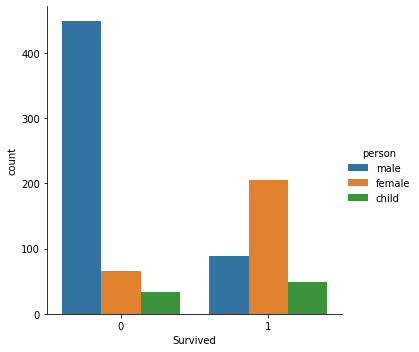

In [15]:
# Now let us see how many survived by categorizing into male, female and children
sns.catplot(x='Survived', data=titanic_details, kind='count', hue='person')

This confirms that priority were given to children and women for survival.

Now let us see the age distriibution of persons who were in the ship. We will use facetgrid here which allows multiple plots using the same dataset.

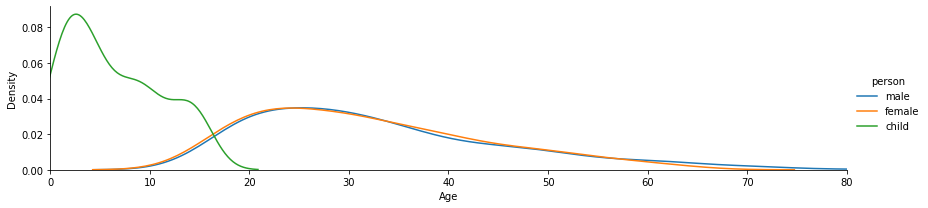

In [16]:
fig = sns.FacetGrid(data=titanic_details, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age')
fig.set(xlim = (0, np.max(titanic_details['Age'])))
fig.add_legend()

Now let us see the age distribution corresponding to different classes in the ship

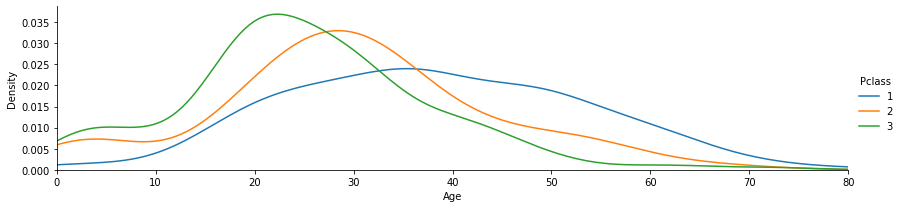

In [17]:
fig = sns.FacetGrid(data=titanic_details, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age')
fig.set(xlim = (0, np.max(titanic_details['Age'])))
fig.add_legend()

It is observed that in class 1, the people are uniformally distributed. Where as in other classes, most people are the age of 20s - 30s.

Now let us see if there was difference in cabins based on the class tickets they have used.

In [18]:
def first_letter(cabin):
    return str(cabin[0])[0]

In [19]:
titanic_details['Cabin First Letter'] = np.nan
titanic_details.loc[titanic_details['Cabin'] != np.nan, 'Cabin First Letter'] = (titanic_details[['Cabin']].dropna()).apply(first_letter, axis=1)
titanic_details.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single,person,Cabin First Letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,male,NaN


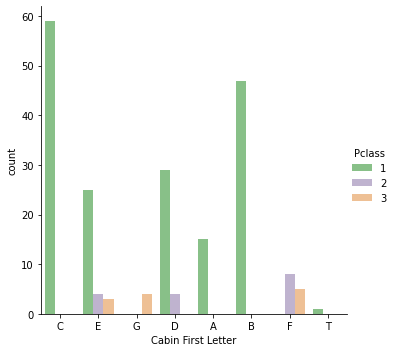

In [20]:
sns.catplot(data=titanic_details, x='Cabin First Letter', kind='count', hue='Pclass', palette='Accent')

This gives us an idea that the people in Cabins starting with C, A and B only had people with class 1 category.

Now let us look on the embarks and try to understand the economy of the regions from where there were passengers.

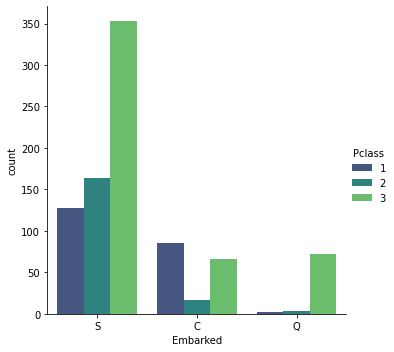

In [21]:
sns.catplot(data=titanic_details, x='Embarked', kind='count', hue='Pclass', palette='viridis')

Its evident that most people from queenstown had taken class 3 tickets which shows their economic inferiority during the time. Where as most people from Cherbourg are in class 1. This place was more economically stable compared to rest of the places.

Now let us see how the class, type of person affected the survival rate.

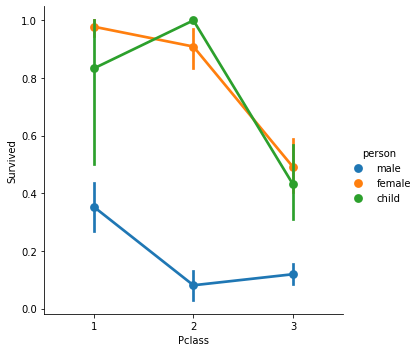

In [22]:
sns.catplot(data=titanic_details, x='Pclass', y='Survived', kind='point', hue='person')

In all classes, the survival rate of males were very less. Even in this section, people with class 1 tickets had more survival rates compared to other classes. Even for females, more survival rate was for people with class 1 tickets.

Now let us see out of the childrens, how many were alone and how many survived.

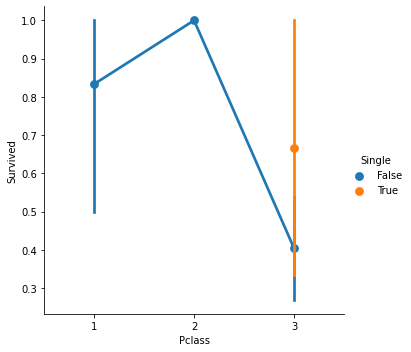

In [23]:
sns.catplot(data=titanic_details[titanic_details['person'] == 'child'], x='Pclass', y='Survived', kind='point', hue='Single')

Children that were alone was only in class 3 category and their survival rate is better than children who were with family in class 3 category.

Now let us see which class had more children 

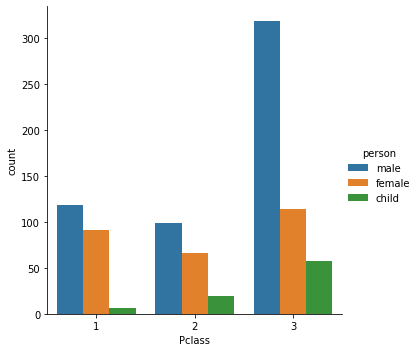

In [24]:
sns.catplot(data=titanic_details, x='Pclass', kind='count', hue='person')

The second class had more children compared to first class. The reason why this class had more survival rate for children.

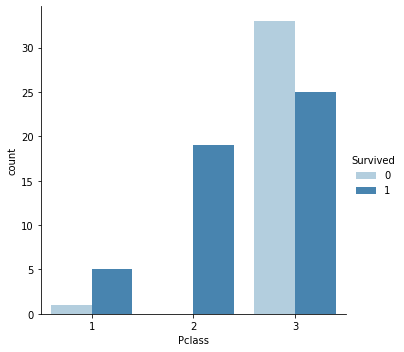

In [54]:
sns.catplot(data=titanic_details[titanic_details['person'] == 'child'], x='Pclass', kind='count', hue='Survived', palette='Blues')

Even though class 3 had highest rate of childres, most of them didn't survive.

Now let us see how did age affect the survival of the passengers.

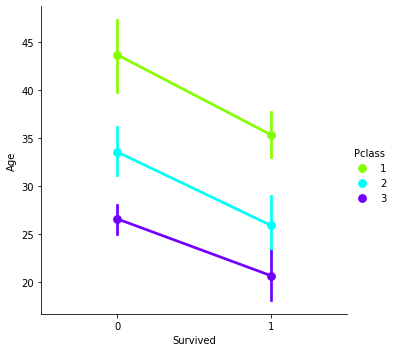

In [49]:
sns.catplot(data=titanic_details, x='Survived', y='Age', kind='point', hue='Pclass', palette='hsv')

Higher the age, lower was the survival rate

Now let us see what was the ages of people who were in class 1

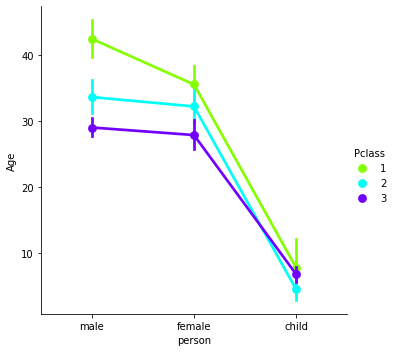

In [48]:
sns.catplot(data=titanic_details, x='person', y='Age', kind='point', hue='Pclass', palette='hsv')

It could be seen that younger generations were mostly in class 2 and 3. Class 1 had people who were older. Very small aged children were in class 2.

Now let us see wheather people with family or alone people had more survival rate

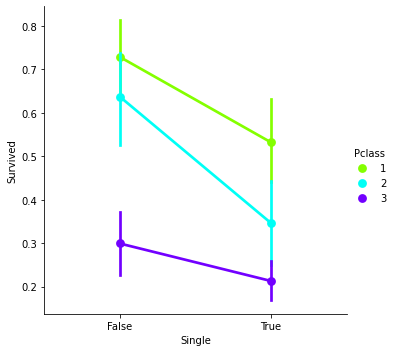

In [60]:
sns.catplot(data=titanic_details, x='Single', y='Survived', kind='point', hue='Pclass', palette='hsv')

People with family had more advantage and had greater survival rate. 